In [29]:
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import shapely
import random
import os

from shapely.geometry import shape
from shapely.geometry import Point


In [121]:
import pystac_client
import planetary_computer as pc

# accesing Azure storage using pystac client
URL = "https://planetarycomputer.microsoft.com/api/stac/v1"
catalog = pystac_client.Client.open(URL)
# ********* THIS NEEDS TO BE DYNAMIC, NOT HARDCODED *********
# ********* HERE I KNOW WHICH IMAGE TEHSE POINTS ARE IN ******
itemid = 'ca_m_3411934_sw_11_060_20180722_20190209'
search = catalog.search(
    collections=["naip"],
    ids = itemid
)
item = list(search.get_items())[0]
# sign and open item
href = pc.sign(item.assets["image"].href)
ds = rasterio.open(href)

In [123]:
fp = os.path.join(os.getcwd(),'campuspoint2018polys/campuspoint2018polys.shp')
polys = gpd.read_file(fp)
polys.head()

polys['iceplant'] = polys.id.apply(lambda x : 1 if x<10 else 0) 
polys.drop('id',axis=1,inplace=True)
polys.to_crs(ds.crs,inplace=True)
polys

,geometry,iceplant
0,"POLYGON ((238347.176 3810851.075, 238350.922 3...",1
1,"POLYGON ((238518.541 3810787.088, 238529.778 3...",1
2,"POLYGON ((238527.281 3810831.411, 238531.339 3...",1
3,"POLYGON ((238513.547 3810846.706, 238512.610 3...",1
4,"POLYGON ((238419.905 3810816.740, 238438.945 3...",1
5,"POLYGON ((239087.262 3811796.777, 239089.759 3...",1
6,"POLYGON ((239498.195 3812050.546, 239512.397 3...",1
7,"POLYGON ((239470.102 3812026.823, 239478.686 3...",1
8,"POLYGON ((239974.833 3812163.541, 239974.209 3...",1
9,"POLYGON ((238375.113 3810886.737, 238379.482 3...",0


In [124]:
polys['area'] = polys.geometry.apply(lambda p : p.area)
polys.sort_values(by='area',ascending=False,inplace=True)
polys.reset_index(drop=True,inplace=True)
polys.head()

,geometry,iceplant,area
0,"POLYGON ((238518.541 3810787.088, 238529.778 3...",1,925.592242
1,"POLYGON ((238593.923 3811127.708, 238612.964 3...",0,918.966999
2,"POLYGON ((238667.901 3811241.951, 238688.814 3...",0,850.911637
3,"POLYGON ((239249.107 3811881.522, 239285.627 3...",0,787.289556
4,"POLYGON ((238564.270 3811247.257, 238588.617 3...",0,740.278963


<AxesSubplot:>

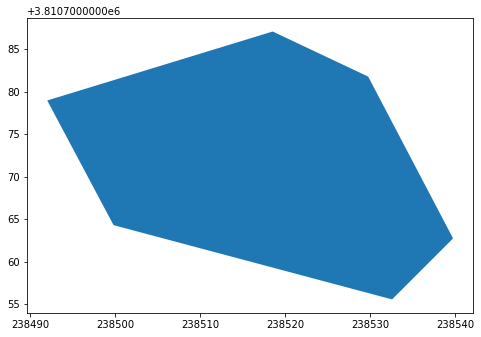

In [125]:
# pick biggest polygon
biggest = polys.filter(items=[0],axis=0).reset_index(drop=True)

fig, ax = plt.subplots()
fig.set_size_inches((8,8))
biggest.plot(ax=ax)

In [126]:
def random_pts_poly(number, polygon):
    points = []
    min_x, min_y, max_x, max_y = polygon.bounds
    i= 0
    while i < number:
        point = Point(random.uniform(min_x, max_x), random.uniform(min_y, max_y))
        if polygon.contains(point):
            points.append(point)
            i += 1
    return points  

<AxesSubplot:>

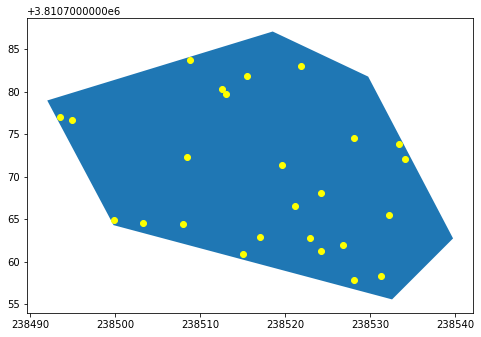

In [127]:
N=25  
# DEFINE NUMBER OF RANDOM POINTS TO BE SELECTED ON BIGGEST POLYGON
# the rest of the polygons will have a number of polygons proportional to their area

points = random_pts_poly(N,biggest['geometry'][0])
# ********** SIMPLIFY THIS ***************
geo_points = gpd.GeoDataFrame()
geo_points['geometry']=points
geo_points.set_crs(polys.crs,inplace=True)
# *******************************************************************

fig, ax = plt.subplots()
fig.set_size_inches((8,8))
biggest.plot(ax=ax)
geo_points.plot(ax=ax,color='yellow')

In [128]:
big_area = biggest['geometry'][0].area
polys['num_random_pts'] = polys.area.apply(lambda a : int(a/big_area*N))
polys.drop('area',axis=1,inplace=True)
polys

,geometry,iceplant,num_random_pts
0,"POLYGON ((238518.541 3810787.088, 238529.778 3...",1,25
1,"POLYGON ((238593.923 3811127.708, 238612.964 3...",0,24
2,"POLYGON ((238667.901 3811241.951, 238688.814 3...",0,22
3,"POLYGON ((239249.107 3811881.522, 239285.627 3...",0,21
4,"POLYGON ((238564.270 3811247.257, 238588.617 3...",0,19
5,"POLYGON ((239545.016 3812095.025, 239571.860 3...",0,16
6,"POLYGON ((238375.113 3810886.737, 238379.482 3...",0,14
7,"POLYGON ((238513.547 3810846.706, 238512.610 3...",1,13
8,"POLYGON ((239498.195 3812050.546, 239512.397 3...",1,13
9,"POLYGON ((238730.016 3811157.986, 238745.311 3...",0,12


In [129]:
i = 0
poly = polys['geometry'][i]
N = polys['num_random_pts'][i]

sample = pd.DataFrame({'geometry': pd.Series(points), 
              'iceplant':pd.Series(np.full(N,polys['iceplant'][i]))
             })
sample['xy']=sample.geometry.apply(lambda p :(p.x, p.y))
sample

/srv/conda/envs/notebook/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


,geometry,iceplant,xy
0,POINT (238524.23394259994 3810768.032249624),1,"(238524.23394259994, 3810768.032249624)"
1,POINT (238508.8657323343 3810783.7780006793),1,"(238508.8657323343, 3810783.7780006793)"
2,POINT (238528.08487635618 3810757.8877935144),1,"(238528.08487635618, 3810757.8877935144)"
3,POINT (238512.61487306788 3810780.331258184),1,"(238512.61487306788, 3810780.331258184)"
4,POINT (238508.0290857881 3810764.4125406425),1,"(238508.0290857881, 3810764.4125406425)"
5,POINT (238521.8659844152 3810783.058945311),1,"(238521.8659844152, 3810783.058945311)"
6,POINT (238515.5329554917 3810781.9040133585),1,"(238515.5329554917, 3810781.9040133585)"
7,POINT (238515.09732193226 3810760.938160916),1,"(238515.09732193226, 3810760.938160916)"
8,POINT (238503.27044340313 3810764.576577395),1,"(238503.27044340313, 3810764.576577395)"
9,POINT (238494.9089973718 3810776.7169573945),1,"(238494.9089973718, 3810776.7169573945)"


In [130]:
data_generator = ds.sample(sample.xy)
#sample
data = []
for i in data_generator:
    data.append(i)
data = np.vstack(data)
data = pd.DataFrame(data, columns=['r','g','b','nifr'])
data

,r,g,b,nifr
0,83,77,83,145
1,89,73,78,167
2,83,83,84,147
3,91,74,79,160
4,89,82,88,127
5,83,73,79,156
6,89,75,78,157
7,93,83,88,149
8,85,83,88,144
9,93,89,86,161
